In [1]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [3]:
laos_mapa = geopandas.read_file(r'C:\\Users\\Usuario\\OneDrive\\Documentos\\Arquivos Henrique\\Monografia\\Monografia\\mapa\LAO_ADM1.geojson')
laos_mapa.head(5)

,id,Level,ISO_Code,Name,iso,adm,adm_int,feature_id,gbid,geometry
0,0,ADM1,LA-XA,Xaignabouli,LAO,ADM1,1,0,LAO_ADM1_1_3_3_0,"POLYGON ((101.74539 19.88053, 101.74843 19.879..."
1,1,ADM1,LA-AT,Attapeu,LAO,ADM1,1,1,LAO_ADM1_1_3_3_1,"POLYGON ((107.59147 14.87336, 107.59141 14.873..."
2,2,ADM1,LA-BK,Bokeo,LAO,ADM1,1,2,LAO_ADM1_1_3_3_2,"POLYGON ((101.25529 20.18622, 101.25468 20.182..."
3,3,ADM1,LA-BL,Bolikhamsai,LAO,ADM1,1,3,LAO_ADM1_1_3_3_3,"POLYGON ((105.25881 18.23862, 105.25859 18.236..."
4,4,ADM1,LA-CH,Champasak,LAO,ADM1,1,4,LAO_ADM1_1_3_3_4,"POLYGON ((106.82797 15.01953, 106.82743 15.016..."


In [4]:
laos_mapa[laos_mapa['Name'].str.contains('^V')]

,id,Level,ISO_Code,Name,iso,adm,adm_int,feature_id,gbid,geometry
13,13,ADM1,LA-VT,Vientiane Capital,LAO,ADM1,1,13,LAO_ADM1_1_3_3_13,"POLYGON ((103.10281 18.14077, 103.10143 18.139..."
14,14,ADM1,LA-VI,Vientiane,LAO,ADM1,1,14,LAO_ADM1_1_3_3_14,"POLYGON ((102.89857 18.34156, 102.89845 18.332..."


In [6]:
laos_zones = geopandas.read_file("https://data.opendevelopmentmekong.net/geoserver/ODMekong/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=ODMekong%3ASEZ_Laos&outputFormat=application%2Fjson")

In [7]:
laos_zones.head(5)

,id,map_id,SEZ,longitute,latitude,year,location,date,mill_USD,dev,size_ha,reference,geometry
0,SEZ_Laos.0,1,Boten Beautiful Land Specific Economic Zone\n,101.673,21.1842,50,Louangnamtha,2003,500.0,Private 100 % (Chinese),1640.00,List_SEZ__Investlaos.pdf,POINT (101.67300 21.18420)
1,SEZ_Laos.1,2,Dongphosy Specific Economic Zone,102.805,17.9529,50,Vientiane Capital\n,2009,50.0,Private 100 % (Malaysia),53.94,List_SEZ__Investlaos.pdf,POINT (102.80500 17.95290)
2,SEZ_Laos.2,3,Golden Triangle Special Economic Zone,100.407,20.2948,50,Bokeo,2007,86.6,Government + Private (Chinese)\n,3000.00,List_SEZ__Investlaos.pdf,POINT (100.40700 20.29480)
3,SEZ_Laos.3,4,Longthanh - Vientiane Specific Economic Zone,102.688,17.8844,50,Vientiane Capital\n,2008,1000.0,Private 100 % (Vietnamese)\n,557.75,List_SEZ__Investlaos.pdf,POINT (102.68800 17.88440)
4,SEZ_Laos.4,5,Pakse – Japan SME Special Economic Zone,105.896,15.0330,50,Champasak,2015,162.5,Government + Private (Lao & Japanese),995.00,List_SEZ__Investlaos.pdf,POINT (105.89600 15.03300)


In [8]:
laos_zones['SEZ'] = [x.replace("\n", "") for x in laos_zones['SEZ']]
laos_zones['location'] = [x.replace('\n', '') for x in laos_zones['location']]
laos_zones['dev'] = [x.replace('\n', '')  for x  in laos_zones['dev']]

In [9]:
laos_zones['dev'].value_counts()

Private 100 % (Chinese)                  2
Laos Government (100%)                   2
Private 100 % (Malaysia)                 1
Government + Private (Chinese)           1
Private 100 % (Vietnamese)               1
Government + Private (Lao & Japanese)    1
Private 100 % (Lao)                      1
Government + Private (Lao & Chinese)     1
Government + Private (Chinese Taipei)    1
Government + Private (Lao)               1
Name: dev, dtype: int64

In [10]:
laos_zones['SEZ']

0      Boten Beautiful Land Specific Economic Zone
1                 Dongphosy Specific Economic Zone
2            Golden Triangle Special Economic Zone
3     Longthanh - Vientiane Specific Economic Zone
4          Pakse – Japan SME Special Economic Zone
5                  Phoukhyo Specific Economic Zone
6                 Savan Seno Special Economic Zone
7                        Saysetha Development Zone
8                   Thakhek Specific Economic Zone
9            Thatluang Lake Specific Economic Zone
10             Vientiane Industrial and Trade Area
11              Luangprabang Special Economic Zone
Name: SEZ, dtype: object

In [11]:
laos_zones['laos_zones_coords'] = laos_zones['geometry'].apply(lambda x: x.representative_point().coords[:])
laos_zones['laos_zones_coords'] = [coords[0] for coords in laos_zones['laos_zones_coords']]

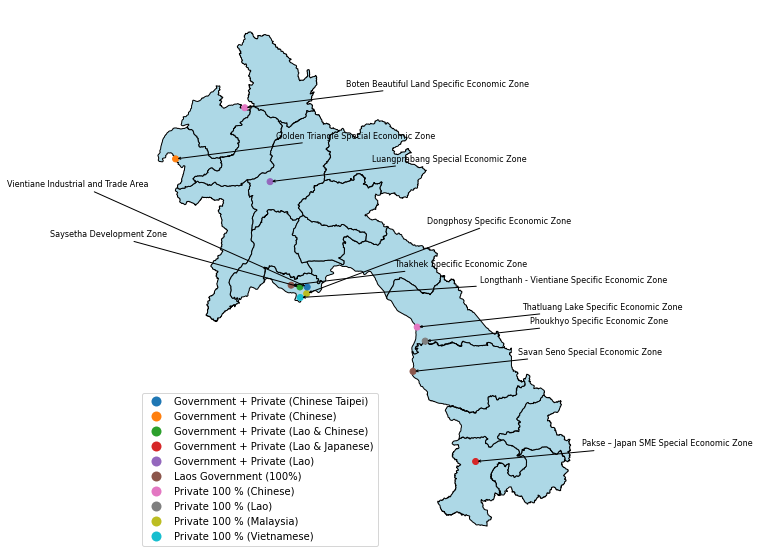

In [51]:
ax1 = laos_mapa.plot(figsize=(10,10), color='lightblue', edgecolor='black')
ax2 = laos_zones.plot('dev', legend=True, legend_kwds={'loc': 'lower left'}, ax=ax1)
arrowprops=dict(arrowstyle='->', color='black', linewidth=1, mutation_scale=5)

for idx, row in laos_zones.iterrows():
    if row['location'] != "Vientiane Capital":
        plt.annotate(text=row['SEZ'], xy=row['laos_zones_coords'], xytext=row['laos_zones_coords'], textcoords='offset pixels',
        size=8, arrowprops=arrowprops)
    elif row['SEZ'] == "Vientiane Industrial and Trade Area":
        plt.annotate(text=row['SEZ'], xy=row['laos_zones_coords'], xytext=(-300,100), textcoords='offset pixels', size=8, arrowprops=arrowprops)
    elif row['SEZ'] == "Longthanh - Vientiane Specific Economic Zone":
        plt.annotate(text=row['SEZ'], xy=row['laos_zones_coords'], xytext=(180,15), textcoords='offset pixels', size=8, arrowprops=arrowprops)
    elif row['SEZ'] == "Dongphosy Specific Economic Zone":
        plt.annotate(text=row['SEZ'], xy=row['laos_zones_coords'], xytext=(120,70), textcoords='offset pixels', size=8, arrowprops=arrowprops)
    elif row['SEZ'] == "Saysetha Development Zone":
        plt.annotate(text=row['SEZ'], xy=row['laos_zones_coords'], xytext=(-250,50), textcoords='offset pixels', size=8, arrowprops=arrowprops)
    elif row['SEZ'] == "Thatluang Lake Specific Economic Zone":
        plt.annotate(text=row['SEZ'], xy=row['laos_zones_coords'], xytext=(row['laos_zones_coords']), textcoords='offset pixels', size=8, arrowprops=arrowprops)

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)

plt.show()

In [13]:
viet_zones = geopandas.read_file("https://data.opendevelopmentmekong.net/geoserver/ODMekong/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=ODMekong%3Avnm_gms_sez_cbez_1&outputFormat=application%2Fjson")

In [14]:
viet_map = geopandas.read_file(r'C:\\Users\\Usuario\\OneDrive\\Documentos\\Arquivos Henrique\\Monografia\\Monografia\\mapa\VNM_ADM1.geojson')

In [15]:
viet_zones

,id,sez_name,sez_type,longitude,latitude,country,province,cartodb_id,created_at,updated_at,geometry
0,vnm_gms_sez_cbez_1.0,An Tay,Industrial zone,106.572270,11.079282,Viet Nam,Binh Duong,174,2015-07-14,2015-07-14,POINT (106.57228 11.07928)
1,vnm_gms_sez_cbez_1.1,Mong Cai BEZ,Border Economic Zone,107.965004,21.523730,VietNam,Quang Ninh,1,2015-07-14,2015-07-14,POINT (107.96500 21.52373)
2,vnm_gms_sez_cbez_1.2,Bac Phong Sinh BEZ,Border Economic Zone,107.719390,21.623455,VietNam,Quang Ninh,2,2015-07-14,2015-07-14,POINT (107.71939 21.62346)
3,vnm_gms_sez_cbez_1.3,Hoanh Mo- Dong Van BEZ,Border Economic Zone,107.536670,21.577875,VietNam,Quang Ninh,3,2015-07-14,2015-07-14,POINT (107.53667 21.57787)
4,vnm_gms_sez_cbez_1.4,Dong Dang BEZ,Border Economic Zone,106.700580,21.943007,VietNam,Lang Son,4,2015-07-14,2015-07-14,POINT (106.70058 21.94301)
...,...,...,...,...,...,...,...,...,...,...,...
287,vnm_gms_sez_cbez_1.287,Nomura-HP,Industrial zone,106.592280,20.902517,Viet Nam,Hai Phong,288,2015-07-14,2015-07-14,POINT (106.59227 20.90252)
288,vnm_gms_sez_cbez_1.288,Tam Phuoc,Industrial zone,106.938774,10.866687,Viet Nam,Dong Nai,289,2015-07-14,2015-07-14,POINT (106.93877 10.86669)
289,vnm_gms_sez_cbez_1.289,Cai Lan,Industrial zone,107.045975,20.975546,Viet Nam,Quang Ninh,290,2015-07-14,2015-07-14,POINT (107.04597 20.97555)
290,vnm_gms_sez_cbez_1.290,Tien Son,Industrial zone,105.994980,21.123257,Viet Nam,Bac Ninh,291,2015-07-14,2015-07-14,POINT (105.99498 21.12326)


In [16]:
viet_zones['viet_zones_coords'] = viet_zones['geometry'].apply(lambda x: x.representative_point().coords[:])
viet_zones['viet_zones_coords'] = [coords[0] for coords in viet_zones['viet_zones_coords']]

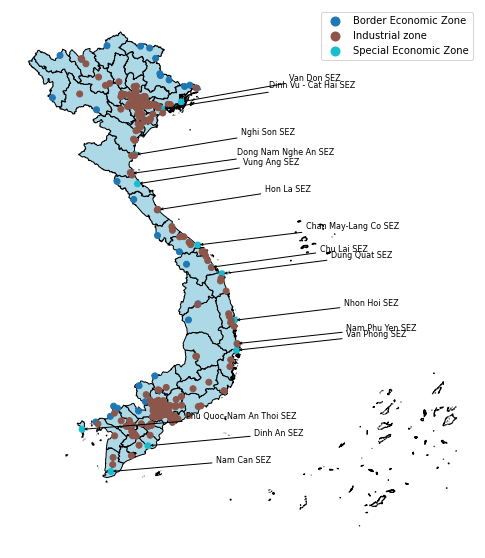

In [17]:
ax1 = viet_map.plot(figsize=(10,10), color='lightblue', edgecolor='black')
ax2 = viet_zones.plot("sez_type", ax=ax1, legend=True)
arrowprops=dict(arrowstyle='->', color='black', linewidth=1, mutation_scale=5)

for idx, row in viet_zones.iterrows():
    if row['sez_type'] == "Special Economic Zone":
        plt.annotate(text=row['sez_name'], xy=row['viet_zones_coords'], xytext=row['viet_zones_coords'], textcoords='offset pixels',
        size=8, arrowprops=arrowprops)


ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [18]:
import json

In [19]:
sez = geopandas.read_file(r"C:\\Users\\Usuario\\OneDrive\\Documentos\\Arquivos Henrique\\Monografia\\Monografia\\mapa\Global Special Economic Zones.geojson")

In [20]:
sez.head(5)

,unique_id,Check,latitude,longitude,country_code,country_type_combo,region,country,zone_type,zone_name,...,populous_citydist,city_1m,city_1mdist,city_500k,city_500kdist,500kcity_range,city_300k,city_300kdist,Note,geometry
0,URY12,URY,-33.887443,-58.416899,URY,URYFree Zone,LAC,Uruguay,Free Zone,Nueva Palmira Free Zone,...,265,Montevideo,265,Montevideo,265,50 to 299 km,Montevideo,265,None,POINT (-58.41690 -33.88744)
1,URY2,URY,-34.470636,-57.831424,URY,URYFree Zone,LAC,Uruguay,Free Zone,Colonia Free Zone,...,182,Montevideo,182,Montevideo,182,50 to 299 km,Montevideo,182,None,POINT (-57.83142 -34.47064)
2,COL2,COL,10.960451,-74.762902,COL,COLFree Industrial Zone,LAC,Colombia,Free Industrial Zone,Barranquilla Free Trade Zone,...,1013,Barranquilla,6,Barranquilla,6,Less than 50 km,Barranquilla,6,None,POINT (-74.76290 10.96045)
3,GUY3,GUY,6.791794,-58.167016,GUY,GUYIndustrial Estate,LAC,Guyana,Industrial Estate,Ruimveldt Industrial Estate,...,4,No city in country with population greater tha...,0,No city in country with population greater tha...,0,Less than 50 km,No city in country with population greater tha...,0,The Government has noted that existing industr...,POINT (-58.16702 6.79179)
4,IND186,IND,23.034146,70.127156,IND,INDSpecial Economic Zone,SA,India,Special Economic Zone,Kandla Special Economic Zone,...,830,Rajkot,191,Morbi,191,50 to 299 km,Morbi,191,None,POINT (70.12716 23.03415)


In [21]:
china_zones = sez[sez['country'] == 'China']
china_zones.head(5)

,unique_id,Check,latitude,longitude,country_code,country_type_combo,region,country,zone_type,zone_name,...,populous_citydist,city_1m,city_1mdist,city_500k,city_500kdist,500kcity_range,city_300k,city_300kdist,Note,geometry
91,CHN25,CHN,31.2510,121.6156,CHN,CHNExport Processing Zone,EAP,China,Export Processing Zone,Shanghai Jinqiao Export Processing Zone,...,26,Shanghai,26,Shanghai,26,Less than 50 km,Shanghai,26,This information exclusively covers the Export...,POINT (121.61560 31.25100)
245,CHN13,CHN,23.1140,113.5300,CHN,CHNExport Processing Zone,EAP,China,Export Processing Zone,Guangzhou Export Processing Zone,...,1472,Dongguan,30,Dongguan,30,Less than 50 km,Dongguan,30,This information exclusively covers the Export...,POINT (113.53000 23.11400)
246,CHN17,CHN,30.2860,120.3630,CHN,CHNExport Processing Zone,EAP,China,Export Processing Zone,Hangzhou Export Processing Zone,...,163,Hangzhou,30,Hangzhou,30,Less than 50 km,Hangzhou,30,This information exclusively covers the Export...,POINT (120.36300 30.28600)
268,CHN3,CHN,40.0800,116.5600,CHN,CHNExport Processing Zone,EAP,China,Export Processing Zone,Beijing Tianzhu Export Processing Zone,...,1224,Beijing,25,Beijing,25,Less than 50 km,Beijing,25,This information exclusively covers the Export...,POINT (116.56000 40.08000)
269,CHN40,CHN,31.0129,121.2710,CHN,CHNExport Processing Zone,EAP,China,Export Processing Zone,Shanghai Songjiang Export Processing Zone,...,36,Shanghai,36,Shanghai,36,Less than 50 km,Shanghai,36,This information exclusively covers the Export...,POINT (121.27100 31.01290)


In [22]:
china_map = geopandas.read_file(r'C:\\Users\\Usuario\\OneDrive\\Documentos\\Arquivos Henrique\\Monografia\\Monografia\\mapa\CHN_ADM1.geojson')

In [23]:
china_zones['china_zones_coords'] = china_zones['geometry'].apply(lambda x: x.representative_point().coords[:])
china_zones['china_zones_coords'] = [coords[0] for coords in china_zones['china_zones_coords']]

C:\Users\Usuario\anaconda3\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


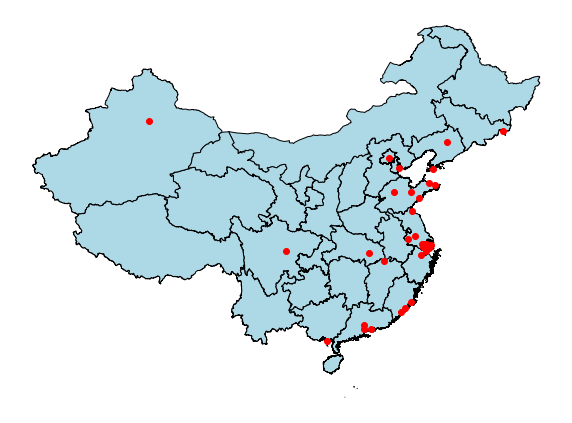

In [44]:
ax1 = china_map.plot(figsize=(10,10), color='lightblue', edgecolor='black')
ax2 = china_zones.plot(ax=ax1, color='red')

ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['right'].set_visible(False)

plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()